# 第19章 马尔可夫链蒙特卡罗法    
     
    Metropolis-Hastings 算法    
        19.4.1 基本原理    
        19.4.2 Metropolis-Hastings 算法    
        19.4.3 单分量 Metropolis-Hastings 算法    
    吉布斯抽样    
        19.5.1 基本原理    
        19.5.2 吉布斯抽样算法    
        19.5.3 抽样计算  
    

In [6]:
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

## 19.4 Metropolis-Hastings 算法

Metropolis-Hastings算法是马尔可夫链蒙特卡罗法的代表算法。

###     19.4.1 基本原理    

#### 1. 马尔科夫链

假设要抽样的概率分布为 **Metropolis-Hastings算法** 采用转移核为 $p(x, x')$的马尔可夫链：

$$ p(x,x')=q(x,x')\alpha(x,x') $$

其中 $q(x,x')$ 和 $\alpha(x,x')$ 分别称为**建议分布（proposal distribution）** 和 **接受分布（acceptance distribution）**。

建议分布 $q(x,x')$ 是另一个马尔可夫链的**转移核**，并且 $q(x,x')$ 是**不可约**的，即其概率值恒不为 $0$，同时是一个容易抽样的分布。

接受分布是

$$\alpha\left(x, x^{\prime}\right)=\min \left\{1, \frac{p\left(x^{\prime}\right) q\left(x^{\prime}, x\right)}{p(x) q\left(x, x^{\prime}\right)}\right\}$$

这时，转移核可以写成

$$p\left(x, x^{\prime}\right)=\left\{\begin{array}{ll}
{q\left(x, x^{\prime}\right),} & {p\left(x^{\prime}\right) q\left(x^{\prime}, x\right) \geqslant p(x) q\left(x, x^{\prime}\right)} \\
{q\left(x^{\prime}, x\right) \frac{p\left(x^{\prime}\right)}{p(x)},} & {p\left(x^{\prime}\right) q\left(x^{\prime}, x\right)<p(x) q\left(x, x^{\prime}\right)}
\end{array}\right.$$

转移核为 $p(x,x')$ 的马尔可夫链上的随机游走以以下方式进行。
如果在时刻 $(t- 1)$ 处于状态 $x$，即 $x_{t-1}=x$，则先按建议分布 $q(x,x')$ 抽样产生一个候选状态 $x'$，然后按照接受分布 $\alpha(x,x')$ 抽样决定是否接受状态 $x'$。
以概率 $\alpha(x,x')$ 接受 $x'$，决定时刻 $t$ 转移到状态 $x'$，而以概率 $ 1-\alpha(x, x')$ 拒绝 $x'$，决定时刻 $t$ 仍停留在状态 $x$。
具体地，从区间 $(0,1)$ 上的均匀分布中抽取一个随机数 $u$，决定时刻 $t$ 的状态。

$$ x_{t}=\left\{\begin{array}{ll}
{x^{\prime},} & {u \leqslant \alpha\left(x, x^{\prime}\right)} \\
{x,} & {u>\alpha\left(x, x^{\prime}\right)}
\end{array}\right. $$

可以证明，转移核为 $p(x,x')$ 的马尔可夫链是可逆马尔可夫链（满足遍历定理），其平稳分布就是 $p(x)$ ，即要抽样的目标分布。
也就是说，这是马尔可夫链蒙特卡罗法的一个具体实现。

**由转移核构成的马尔可夫链是可逆的，即** $p(x)p(x,x')=p(x')p(x',x)$ **并且 $p(x)$ 是该马尔可夫链的平稳分布。**

#### 2. 建议分布

建议分布 $q(x,x')$ 有多种可能的形式，这里介绍两种常用形式。

**第一种形式**

假设建议分布是对称的，即对任意的 $x$ 和 $x'$ 有

$$ q(x,x')=q(x',x) $$

这样的建议分布称为 Metropolis 选择，也是 Metropolis-Hastings 算法最初采用的建议分布。
这时，接受分布 $\alpha(x,x')$ 简化为

$$ \alpha\left(x, x^{\prime}\right)=\min \left\{1, \frac{p\left(x^{\prime}\right)}{p(x)}\right\} $$

Metropolis 选择的一个特例是 $q(x,x')$ 取条件概率分布 $p(x'|x)$，定义为多元正态分布，其均值是 $x$，其协方差矩阵是常数矩阵。

Metropolis 选择的另一个特例是令 $ q(x,x') = q(|x-x'|)$，这时算法称为随机游走 Metropolis 算法。
例如，

$$ q\left(x, x^{\prime}\right) \propto \exp \left(-\frac{\left(x^{\prime}-x\right)^{2}}{2}\right) $$

Metropolis 选择的特点是当 $x'$ 与 $x$ 接近时，$q(x,x')$ 的概率值高，否则 $q(x,x')$ 的概率值低。
状态转移在附近点的可能性更大。

**第二种形式**

独立抽样。
假设 $q(x,x')$ 与当前状态 $x$ 无关，即 $q(x,x') = q(x')$。
建议分布的计算按照 $q(x')$ 独立抽样进行。
此时，接受分布 $\alpha(x,x')$ 可以写成

$$ \alpha\left(x, x^{\prime}\right)=\min \left\{1, \frac{w\left(x^{\prime}\right)}{w(x)}\right\} $$

其中 $w(x')=p(x')/q(x'), w(x)=p(x)/q(x)$

独立抽样实现简单，但可能收敛速度慢，通常选择接近目标分布 $p(x)$ 的分布作为建议分布 $q(x)$。


#### 3. 满条件分布

###     19.4.2 Metropolis-Hastings 算法

输入：抽样的目标分布的密度函数 $p(x)$，函数 $f(x)$；

输出：$p(x)$ 的随机样本 $x_{m+1}, x_{m+2}, \cdots, x_n$，函数样本均值 $f_{mn}$；

参数：收敛步数 $m$ ，迭代步数 $n$。

1. 任意选择一个初始值$x_0$
2. 对 $i=l,2,\cdots,n$ 循环执行

    a. 设状态 $x_{i-1}=x$，按照建议分布 $q(x,x')$ 随机抽取一个候选状态 $x'$。

    b. 计算接受概率
    
    $$ \alpha\left(x, x^{\prime}\right)=\min \left\{1, \frac{p\left(x^{\prime}\right) q\left(x^{\prime}, x\right)}{p(x) q\left(x, x^{\prime}\right)}\right\} $$
    
    c. 从区间 $(0,1)$ 中按均匀分布随机抽取一个数 $u$。
    若 $u \leq \alpha(x,x')$，则状态 $x_i=x'$；否则，状态 $x'=x$。

3. 得到样本集合 $\{x_{m+1}, x_{m+2}, \cdots, x_n\}$，计算
    
    $$ f_{m n}=\frac{1}{n-m} \sum_{i=m+1}^{n} f\left(x_{i}\right) $$

In [11]:
def metropolis(_target_func, _propose_func, num, downsample=1):
    """ Metropolis algorithm
    
    Parameters
    ----------
    _target_func : callable, (un)normalized distribution to be sampled from
    _propose_func : callable, distribution to generate sample, which is symmetric at the origin
    num : int, number of samples to draw
    downsample : int， downsampling factor
    
    Returns
    -------
    sample : list, generated sample
    """
    
    # 任意选择一个初始值x0，此处设置为0
    # 如果是多维分布，则可以使用一个NumPy向量作为初始值
    x = 0
    sample = []
    
    for i in range(num * downsample):
        
        x_new = x + _propose_func.rvs()
        
        # 计算接受概率 alpha = {1 - \frac{p(x')q(x',x)}{p(x)q(x,x')}}
        # 因为proposal dist是对称分布，
        # 所以可以把接受概率简化成 alpha = {1 - \frac{p(x')}{p(x)}}
        accept_proba = _target_func(x_new) / _target_func(x)
        
        # 从区间[0,1]中按均匀分布随机抽取一个数u
        u = np.random.uniform(0, 1)
        
        # 如果接受率大于随机数u，那么就更新状态，否则保持状态不变。
        if u < accept_proba:
            x = x_new
            
        if i % downsample == 0:
            sample.append(x)
            
    return sample

In [20]:
def metropolis_hastings(_target_func, _propose_func, num, downsample=1):
    """ Metropolis algorithm
    
    Parameters
    ----------
    _target_func : callable, (un)normalized distribution to be sampled from
    _propose_func : callable, distribution to generate sample, which is symmetric at the origin
    num : int, number of samples to draw
    downsample : int， downsampling factor
    
    Returns
    -------
    sample : list, generated sample
    """
    
    # 任意选择一个初始值x0，此处设置为0
    # 如果是多维分布，则可以使用一个NumPy向量作为初始值
    x = 0
    sample = []
    
    for i in range(num * downsample):
        
        x_new = x + _propose_func.rvs()
        
        # 计算接受概率 alpha = {1 - \frac{p(x')q(x',x)}{p(x)q(x,x')}}
        accept_proba = (_target_func(x_new) * _propose_func.pdf(x - x_new)) / (_target_func(x) * _propose_func.pdf(x_new - x))
        
        # 从区间[0,1]中按均匀分布随机抽取一个数u
        u = np.random.uniform(0, 1)
        
        # 如果接受率大于随机数u，那么就更新状态，否则保持状态不变。
        if u < accept_proba:
            x = x_new
            
        if i % downsample == 0:
            sample.append(x)
            
    return sample

In [21]:
def plot_sampling_algorithm(_target, _propose, c=15, num=5000, symmetry=True):
    
    if symmetry:
        samples = metropolis(_target, _propose, num)
    else:
        samples = metropolis_hastings(_target, _propose, num)        
    
    fig = plt.figure()

    # 绘制 Metropolis algorithm 得到的样本点
    ax1 = fig.add_subplot(111)
    _, bins, _ = plt.hist(samples, bins=100, label='sampling', color="blue")
    ax1.set_ylabel('hist')
    ax1.set_title("Metropolis algorithm")

    # 绘制 目标分布 和 建议分布
    ax2 = ax1.twinx()
    plt.plot(bins, target(bins))
    plt.plot(bins, c * propose.pdf(bins), label=r"$kq(z)$")
    ax2.set_ylabel('prob')

    plt.show()

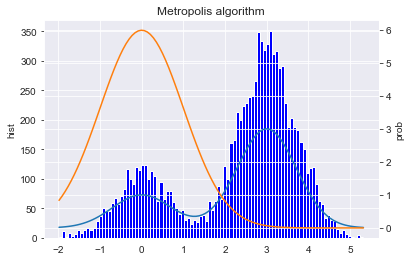

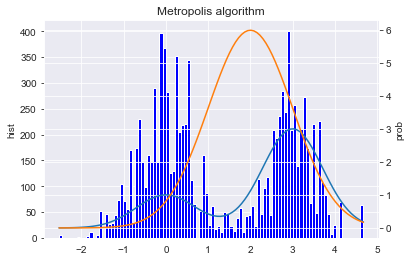

In [27]:
# target是要进行采样的复杂分布
def target(x):
    return np.exp(-x ** 2) + 3 * np.exp(-(x - 3) ** 2)

# propose是一个对称正态分布
propose = stats.norm(loc=np.array([0.]), scale=np.array([1.]))

plot_sampling_algorithm(target, propose, num=10000)

# propose是一个不对称正态分布
propose = stats.norm(loc=np.array([2.]), scale=np.array([1.]))
plot_sampling_algorithm(target, propose, num=10000, symmetry=False)

### 19.4.3 单分量 Metropolis-Hastings 算法    

在Metropolis-Hastings算法中，通常需要对多元变量分布进行抽样，有时对多元变最分布的抽样是困难的。
可以对多元变量的每一变量的条件分布依次分别进行抽样，从而实现对整个多元变量的一次抽样，这就是单分量Metropolis-Hastings (single-component Metropolis-Hastings) 算法。

假设马尔科夫链的状态由 $k$ 维随机变量表示

$$ x=(x_1,x_2,\cdots,x_n)^T $$

其中 $x_j$ 表示随机变量 $x$ 的第 $j$ 个分量，$j=1,2,\cdots, k$， 而 $x^{(i)}$ 表示马尔科夫链在时刻 $i$ 的状态

## 19.5 吉布斯抽样    

###     19.5.1 基本原理    

###     19.5.2 吉布斯抽样算法    

###     19.5.3 抽样计算  
